In [166]:
import kagglehub

# Download latest version of Tiny ImageNet dataset
path = kagglehub.dataset_download("akash2sharma/tiny-imagenet")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/akash2sharma/tiny-imagenet/versions/1


In [167]:
import os
import shutil
import random

# Define directories
source_dir = os.path.join(path, "tiny-imagenet-200/train")
destination_dir = "tiny-imagenet-10/m_train"
test_destination_dir = "tiny-imagenet-10/m_test"

# Ensure directories exist
os.makedirs(destination_dir, exist_ok=True)
os.makedirs(test_destination_dir, exist_ok=True)

# Selected classes
selected_classes = [
    'n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01768244',
    'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672'
]

# Function to clear a directory (delete all files inside it)
def clear_directory(directory):
    """Deletes all files in the specified directory."""
    if os.path.exists(directory):
        for filename in os.listdir(directory):
            file_path = os.path.join(directory, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)  # Remove file or symlink
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)  # Remove directory
            except Exception as e:
                print(f"⚠️ Error removing file {file_path}: {e}")

# ✅ Step 1: Copy Classes from Source to Destination
for class_name in selected_classes:
    class_source_dir = os.path.join(source_dir, class_name, "images")  # Source images folder
    class_train_dir = os.path.join(destination_dir, class_name, "images")  # Destination training folder
    class_test_dir = os.path.join(test_destination_dir, class_name, "images")  # Fixed test folder

    # Ensure directories exist
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)

    # Clear the test folder if it already contains files
    clear_directory(class_test_dir)

    if os.path.exists(class_source_dir):
        shutil.copytree(class_source_dir, class_train_dir, dirs_exist_ok=True)
        print(f"✅ Copied: {class_name} -> {class_train_dir}")
    else:
        print(f"❌ ERROR: {class_source_dir} does not exist!")

# ✅ Step 2: Allocate 10% for Testing
for class_name in selected_classes:
    class_train_dir = os.path.join(destination_dir, class_name, "images")
    class_test_dir = os.path.join(test_destination_dir, class_name, "images")  # Fixed test folder

    os.makedirs(class_test_dir, exist_ok=True)  # Ensure images/ exists inside test

    if not os.path.exists(class_train_dir):
        print(f"⚠️ Skipping {class_name}: Training directory not found at {class_train_dir}.")
        continue

    # List images
    images = [f for f in os.listdir(class_train_dir) if f.lower().endswith((".jpeg", ".jpg", ".png"))]
    print(f"📸 Found {len(images)} images in {class_train_dir}")

    if len(images) == 0:
        print(f"⚠️ WARNING: No images found for {class_name}. Check file paths.")
        continue

    # Shuffle and move 30% for testing
    random.shuffle(images)
    num_test_samples = int(0.3 * len(images))
    test_images = images[:num_test_samples]

    for img in test_images:
        src_path = os.path.join(class_train_dir, img)
        dest_path = os.path.join(class_test_dir, img)

        if os.path.exists(src_path):  # Check before moving
            shutil.move(src_path, dest_path)
        else:
            print(f"⚠️ WARNING: File {src_path} not found, skipping.")

    print(f"✅ Moved {num_test_samples} images to test set: {class_name}")

print("🎉 Dataset split complete!")


✅ Copied: n01443537 -> tiny-imagenet-10/m_train/n01443537/images
✅ Copied: n01629819 -> tiny-imagenet-10/m_train/n01629819/images
✅ Copied: n01641577 -> tiny-imagenet-10/m_train/n01641577/images
✅ Copied: n01644900 -> tiny-imagenet-10/m_train/n01644900/images
✅ Copied: n01768244 -> tiny-imagenet-10/m_train/n01768244/images
✅ Copied: n01770393 -> tiny-imagenet-10/m_train/n01770393/images
✅ Copied: n01774384 -> tiny-imagenet-10/m_train/n01774384/images
✅ Copied: n01774750 -> tiny-imagenet-10/m_train/n01774750/images
✅ Copied: n01784675 -> tiny-imagenet-10/m_train/n01784675/images
✅ Copied: n01855672 -> tiny-imagenet-10/m_train/n01855672/images
📸 Found 500 images in tiny-imagenet-10/m_train/n01443537/images
✅ Moved 150 images to test set: n01443537
📸 Found 500 images in tiny-imagenet-10/m_train/n01629819/images
✅ Moved 150 images to test set: n01629819
📸 Found 500 images in tiny-imagenet-10/m_train/n01641577/images
✅ Moved 150 images to test set: n01641577
📸 Found 500 images in tiny-image

In [ ]:
import os

def count_images(directory):
    """Count the number of images in each class directory."""
    for class_name in sorted(os.listdir(directory)):
        class_dir = os.path.join(directory, class_name, "images")
        if os.path.exists(class_dir):
            num_images = len([f for f in os.listdir(class_dir) if f.lower().endswith((".jpeg", ".jpg", ".png"))])
            print(f"📂 {class_name}: {num_images} images")
        else:
            print(f"⚠️ WARNING: {class_dir} does not exist!")

# Check Train and Test directories
print("🔍 Checking Training Set:")
count_images("tiny-imagenet-10/m_train")

print("\n🔍 Checking Test Set:")
count_images("tiny-imagenet-10/m_test")



🔍 Checking Training Set:
📂 n01443537: 350 images
📂 n01629819: 350 images
📂 n01641577: 350 images
📂 n01644900: 350 images
📂 n01768244: 350 images
📂 n01770393: 350 images
📂 n01774384: 350 images
📂 n01774750: 350 images
📂 n01784675: 350 images
📂 n01855672: 350 images

🔍 Checking Test Set:
📂 n01443537: 150 images
📂 n01629819: 150 images
📂 n01641577: 150 images
📂 n01644900: 150 images
📂 n01768244: 150 images
📂 n01770393: 150 images
📂 n01774384: 150 images
📂 n01774750: 150 images
📂 n01784675: 150 images
📂 n01855672: 150 images


In [169]:
#!pip install torch torchvision matplotlib

In [170]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformations (resizing, normalization, etc.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64 (Tiny ImageNet size)
    transforms.ToTensor(),        # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values
])

# Load Training Data
train_dataset = datasets.ImageFolder(root="tiny-imagenet-10/m_train", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Load Testing Data
test_dataset = datasets.ImageFolder(root="tiny-imagenet-10/m_test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Print dataset sizes
print(f"✅ Training Samples: {len(train_dataset)}")
print(f"✅ Testing Samples: {len(test_dataset)}")


✅ Training Samples: 3500
✅ Testing Samples: 1500


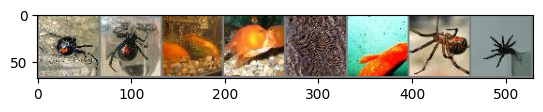

Labels: [6 6 0 0 4 0 6 7]


In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))  # Show first 8 images
print("Labels:", labels[:8].numpy())


In [172]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the CNN model with 5 layers
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)  # Input: 3 channels (RGB), Output: 64
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 512)  # Adjust based on image size
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)  # Output 10 classes

        # Activation function
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = self.pool(self.relu(self.conv5(x)))

        # Flatten before passing to FC layers
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation (Softmax will be applied in loss function)
        return x

In [ ]:

# Define transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

# Load dataset
train_dataset = datasets.ImageFolder(root="tiny-imagenet-10/m_train", transform=transform)
test_dataset = datasets.ImageFolder(root="tiny-imagenet-10/m_test", transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Print dataset sizes
print(f"✅ Training Samples: {len(train_dataset)}")
print(f"✅ Testing Samples: {len(test_dataset)}")



✅ Training Samples: 3500
✅ Testing Samples: 1500


Epoch 1/10 - Loss: 0.2740 - Accuracy: 92.34%
Epoch 2/10 - Loss: 0.0907 - Accuracy: 97.26%
Epoch 3/10 - Loss: 0.0575 - Accuracy: 98.17%
Epoch 4/10 - Loss: 0.0312 - Accuracy: 99.06%
Epoch 5/10 - Loss: 0.0252 - Accuracy: 99.20%
Epoch 6/10 - Loss: 0.0272 - Accuracy: 99.14%
Epoch 7/10 - Loss: 0.0189 - Accuracy: 99.37%
Epoch 8/10 - Loss: 0.0069 - Accuracy: 99.80%
Epoch 9/10 - Loss: 0.0035 - Accuracy: 99.89%
Epoch 10/10 - Loss: 0.0080 - Accuracy: 99.86%
🎉 Training Complete!


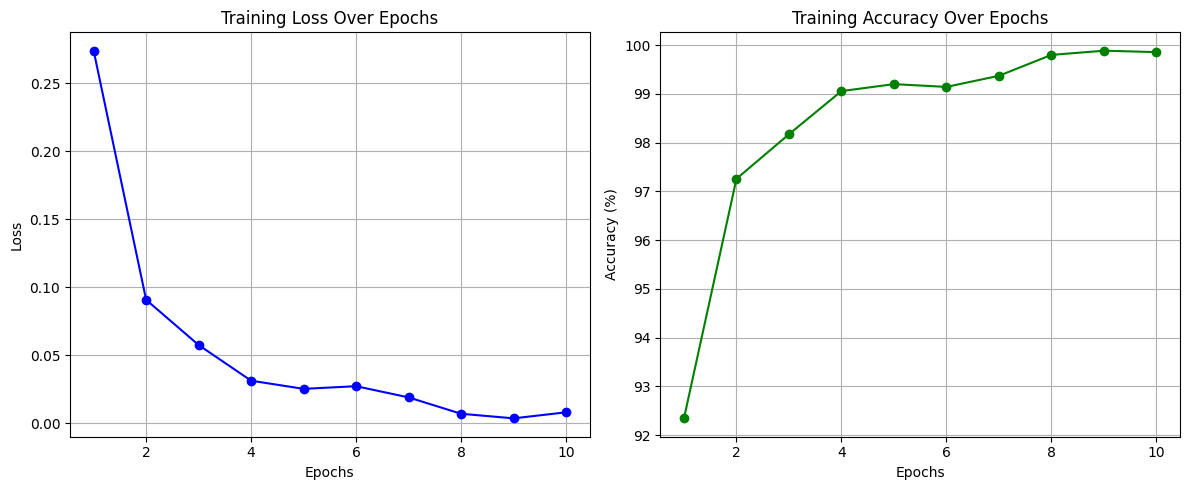

In [174]:
import matplotlib.pyplot as plt

# Modify the train_model function to keep track of loss and accuracy
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()  # Set to training mode
    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Record loss and accuracy for each epoch
        epoch_losses.append(running_loss / len(train_loader))
        epoch_accuracies.append(100 * correct / total)

        # Print epoch results
        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f} - Accuracy: {100 * correct / total:.2f}%")

    print("🎉 Training Complete!")

    # Plot loss and accuracy over epochs
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), epoch_losses, marker='o', color='b', label='Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), epoch_accuracies, marker='o', color='g', label='Accuracy')
    plt.title('Training Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run training
train_model(model, train_loader, criterion, optimizer, epochs=10)


In [175]:
def evaluate_model(model, test_loader):
    model.eval()  # Set to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"✅ Test Accuracy: {100 * correct / total:.2f}%")

# Run evaluation
evaluate_model(model, test_loader)


✅ Test Accuracy: 93.47%


In [164]:
torch.save(model.state_dict(), "cnn_tinyimagenet10.pth")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [165]:
from google.colab import files
# Download the model file from the current directory
files.download('cnn_tinyimagenet_new.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>